# CNN

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Activation,
    Dropout,
    Flatten,
    Dense,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model

# Ignoring warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub
import os
import shutil
from glob import glob
import random

# Download the dataset
path = kagglehub.dataset_download("techsash/waste-classification-data")
print("Path to dataset files:", path)


100%|██████████| 427M/427M [00:03<00:00, 114MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"

for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)

Directory: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1
Subdirectories: ['DATASET', 'dataset']
Files: []
--------------------------------------------------
Directory: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET
Subdirectories: ['TRAIN', 'TEST']
Files: []
--------------------------------------------------
Directory: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN
Subdirectories: ['O', 'R']
Files: []
--------------------------------------------------
Directory: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN/O
Subdirectories: []
Files: ['O_5706.jpg', 'O_5578.jpg', 'O_12516.jpg', 'O_4352.jpg', 'O_552.jpg', 'O_1122.jpg', 'O_567.jpg', 'O_7763.jpg', 'O_5702.jpg', 'O_2752.jpg', 'O_376.jpg', 'O_10922.jpg', 'O_10865.jpg', 'O_7967.jpg', 'O_1538.jpg', 'O_10791.jpg', 'O_3055.jpg', 'O_6399.jpg', 'O_4389.jpg', 'O_4538.jpg', 'O_9030.jpg', '

In [4]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST"


In [5]:
import os

train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"

if not os.path.exists(train_path):
    print(f"Path does not exist: {train_path}")
else:
    print("Path exists. Proceeding with data processing.")


Path exists. Proceeding with data processing.


In [6]:
import os
import shutil
import random

def create_subset(source_path, dest_path, subset_ratio=0.5):
    # Ensure the destination directory exists
    os.makedirs(dest_path, exist_ok=True)

    for category in os.listdir(source_path):
        category_path = os.path.join(source_path, category)
        if not os.path.isdir(category_path):
            continue

        # Destination category directory
        dest_category_path = os.path.join(dest_path, category)
        os.makedirs(dest_category_path, exist_ok=True)

        # Get all files in the category
        files = os.listdir(category_path)
        random.shuffle(files)

        # Select a subset
        subset_size = int(len(files) * subset_ratio)
        subset_files = files[:subset_size]

        # Copy the subset files
        for file in subset_files:
            src_file = os.path.join(category_path, file)
            dest_file = os.path.join(dest_category_path, file)
            shutil.copy(src_file, dest_file)

# Paths for subset
subset_train_path = "dataset/TRAIN_SUBSET"
subset_test_path = "dataset/TEST_SUBSET"
import os
import shutil
import random

def create_subset(source_path, dest_path, subset_ratio=0.5):
    # Ensure the destination directory exists
    os.makedirs(dest_path, exist_ok=True)

    for category in os.listdir(source_path):
        category_path = os.path.join(source_path, category)
        if not os.path.isdir(category_path):
            continue

        # Destination category directory
        dest_category_path = os.path.join(dest_path, category)
        os.makedirs(dest_category_path, exist_ok=True)

        # Get all files in the category
        files = os.listdir(category_path)
        random.shuffle(files)

        # Select a subset
        subset_size = int(len(files) * subset_ratio)
        subset_files = files[:subset_size]

        # Copy the subset files
        for file in subset_files:
            src_file = os.path.join(category_path, file)
            dest_file = os.path.join(dest_category_path, file)
            shutil.copy(src_file, dest_file)

# Paths for subset
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST"
subset_train_path = "dataset/TRAIN_SUBSET"
subset_test_path = "dataset/TEST_SUBSET"

# Create subsets
create_subset(train_path, subset_train_path, subset_ratio=0.5)
create_subset(test_path, subset_test_path, subset_ratio=0.5)

print("Subset created successfully!")

# Create subsets
create_subset(train_path, subset_train_path, subset_ratio=0.5)
create_subset(test_path, subset_test_path, subset_ratio=0.5)

print("Subset created successfully!")


Subset created successfully!
Subset created successfully!


In [7]:
for root, dirs, files in os.walk(subset_test_path):
    print(f"Directory: {root}")
    print(f"Number of files: {len(files)}")
    print("-" * 50)


Directory: dataset/TEST_SUBSET
Number of files: 0
--------------------------------------------------
Directory: dataset/TEST_SUBSET/O
Number of files: 1054
--------------------------------------------------
Directory: dataset/TEST_SUBSET/R
Number of files: 824
--------------------------------------------------


100%|██████████| 7498/7498 [00:06<00:00, 1172.30it/s]


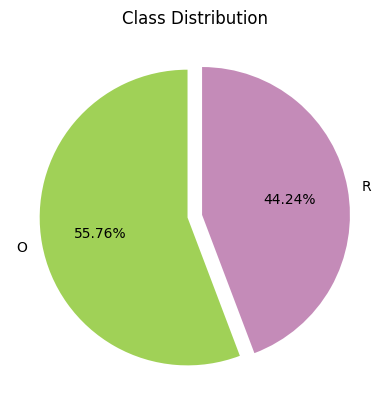

In [8]:


# Define paths for the smaller dataset
train_path = "dataset/TRAIN_SUBSET"
test_path = "dataset/TEST_SUBSET"


# Data preprocessing and visualization
x_data = []
y_data = []

# Reading images and labels
for category in glob(train_path + "/*"):
    label = category.split("/")[-1]  # Extract label (folder name)
    for file in tqdm(glob(category + "/*")):
        img_array = cv2.imread(file)
        if img_array is not None:  # Ensure image is successfully read
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (150, 150))  # Resize to (150x150)
            x_data.append(img_array)
            y_data.append(label)

# Converting to a DataFrame
data = pd.DataFrame({"image": x_data, "label": y_data})

# Visualizing class distribution
colors = ['#a0d157', '#c48bb8']
plt.pie(
    data['label'].value_counts(),
    labels=data['label'].value_counts().index,
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.05] * len(data['label'].value_counts()),
)
plt.title("Class Distribution")
plt.show()


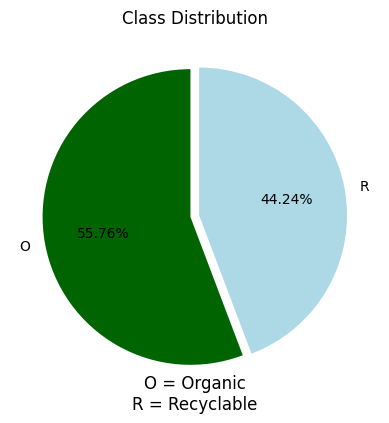

In [9]:
# Visualizing class distribution with dark green and light blue
colors = ['#006400', '#ADD8E6']  # Dark green and light blue

plt.pie(
    data['label'].value_counts(),
    labels=data['label'].value_counts().index,
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.03] * len(data['label'].value_counts()),
)
# Adding a text annotation to explain the labels
plt.text(
    0, -1.2, "O = Organic\nR = Recyclable", ha='center', va='center', fontsize=12, color='black'
)
plt.title("Class Distribution")
plt.show()


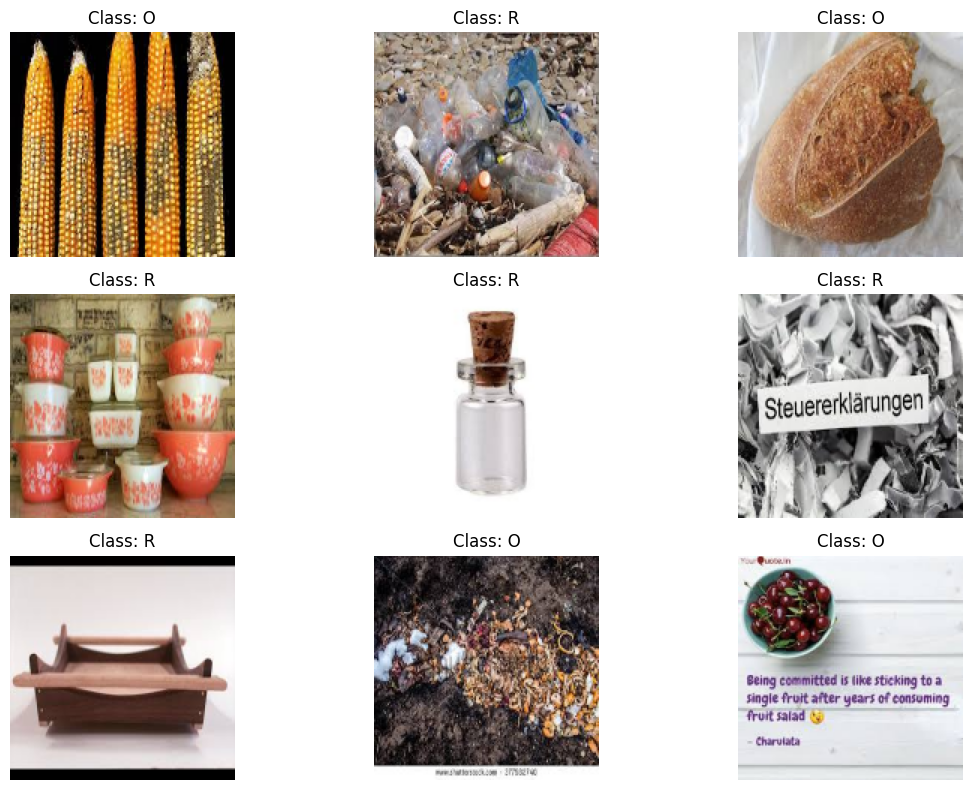

In [10]:
from tensorflow.keras.optimizers import Adam




# Visualization of Sample Images
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    index = np.random.randint(len(data))  # Ensure index is within range
    plt.title(f"Class: {data['label'][index]}")
    plt.imshow(data['image'][index])
    plt.axis("off")

plt.tight_layout()
plt.show()





In [11]:
# CNN Model
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten & Fully Connected Layers
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))  # Changed activation for categorical crossentropy

# Compile Model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 25,802,370 (98.43 MB)

 Trainable params: 25,801,282 (98.42 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler


# Model

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Ensure train_path and test_path are defined
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST"


print("Train Path Exists:", os.path.exists(train_path))
print("Test Path Exists:", os.path.exists(test_path))

# If directories exist, list the contents
if os.path.exists(train_path):
    print("Train Directory Contents:", os.listdir(train_path))

if os.path.exists(test_path):
    print("Test Directory Contents:", os.listdir(test_path))

batch_size = 64  # Reduced batch size for better memory usage

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]  # Added brightness augmentation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Reduce by 5% every epoch

lr_callback = LearningRateScheduler(lr_scheduler)

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Ensure `model` is defined before training
# Define your model (Example: Simple CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[lr_callback, early_stopping]
)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Accuracy
ax0 = plt.subplot(gs[0])
ax0.plot(hist.history['accuracy'], label='Train Accuracy', color='b')
ax0.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='r')
ax0.set_xlabel("Epochs")
ax0.set_ylabel("Accuracy")
ax0.legend()
ax0.set_title("Model Accuracy")

# Loss
ax1 = plt.subplot(gs[1])
ax1.plot(hist.history['loss'], label='Train Loss', color='b')
ax1.plot(hist.history['val_loss'], label='Validation Loss', color='r')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.set_title("Model Loss")

plt.tight_layout()
plt.show()


Train Path Exists: True
Test Path Exists: True
Train Directory Contents: ['O', 'R']
Test Directory Contents: ['O', 'R']
Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1604s 5s/step - accuracy: 0.7088 - loss: 6.5513 - val_accuracy: 0.7748 - val_loss: 0.4992 - learning_rate: 9.5000e-04
Epoch 2/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1610s 5s/step - accuracy: 0.8076 - loss: 0.4442 - val_accuracy: 0.8361 - val_loss: 0.4684 - learning_rate: 9.0250e-04
Epoch 3/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1592s 5s/step - accuracy: 0.8241 - loss: 0.4133 - val_accuracy: 0.8460 - val_loss: 0.3867 - learning_rate: 8.5737e-04
Epoch 4/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1638s 5s/step - accuracy: 0.8240 - loss: 0.4140 - val_accuracy: 0.8345 - val_loss: 0.4201 - learning_rate: 8.1451e-04
Epoch 5/5
290/353 ━━━━━━━━━━━━━━━━━━━━ 4:36 4s/step - accuracy: 0.8220 - loss: 0.4041

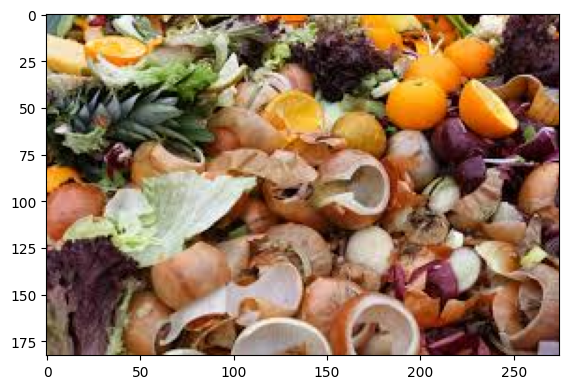

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
The image shown is Organic Waste


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_fun(img):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    plt.show()  # Ensure image is displayed

    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])

    result = np.argmax(model.predict(img))

    if result == 0:
        print('The image shown is Recyclable Waste')
    elif result == 1:
        print('The image shown is Organic Waste')

# Load test image
test_img = cv2.imread('/content/download.jpg')

# Call function
predict_fun(test_img)


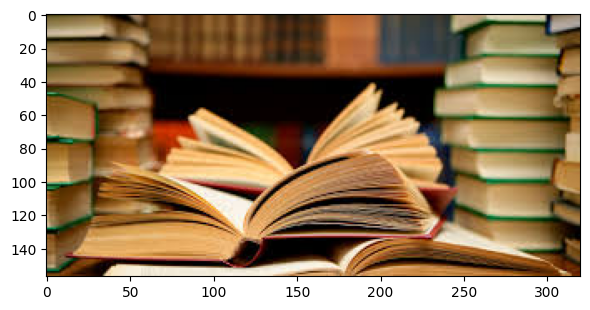

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
The image shown is Organic Waste


In [16]:
# Load test image
test_img = cv2.imread('/content/download (1).jpg')

# Call function
predict_fun(test_img)